House Prices Prediction

In [153]:
import pandas as pd
import numpy as np



In [154]:
df = pd.read_csv("dataset/train.csv")
display(df.head())
print("The dataset has ", df.shape[0], " rows and ", df.shape[1], " columns.")

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


The dataset has  1460  rows and  81  columns.


In [155]:
display(df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

None

The dataset might have many null values so let's check

In [156]:
df.isnull().sum().sort_values(ascending=False)

PoolQC         1453
MiscFeature    1406
Alley          1369
Fence          1179
FireplaceQu     690
               ... 
ExterQual         0
Exterior2nd       0
Exterior1st       0
RoofMatl          0
SalePrice         0
Length: 81, dtype: int64

Let's take a statistical view

In [157]:
df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


As we can see, there are many outliers in this dataset

In [158]:
import matplotlib as plt
import seaborn as sns

<AxesSubplot:xlabel='SalePrice', ylabel='Count'>

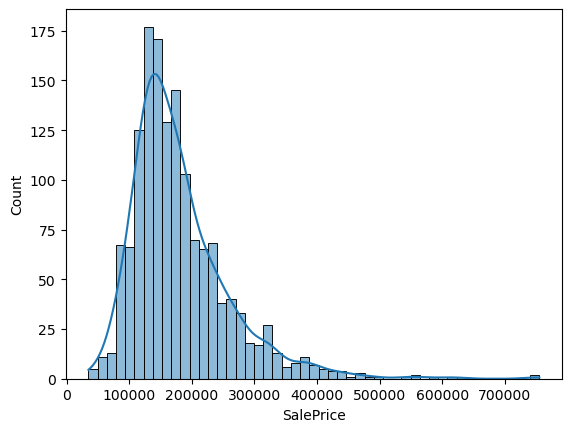

In [159]:
sns.histplot(df["SalePrice"], kde = True)

So the SalePrice, which is the output we are concerned about, is right skewed. We need to apply log transformation later.

In [160]:
corr = df.corr()
display(corr[:6])

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
Id,1.000000,0.011156,-0.010601,-0.033226,-0.028365,0.012609,-0.012713,-0.021998,-0.050298,-0.005024,...,-0.029643,-0.000477,0.002889,-0.046635,0.001330,0.057044,-0.006242,0.021172,0.000712,-0.021917
MSSubClass,0.011156,1.000000,-0.386347,-0.139781,0.032628,-0.059316,0.027850,0.040581,0.022936,-0.069836,...,-0.012579,-0.006100,-0.012037,-0.043825,-0.026030,0.008283,-0.007683,-0.013585,-0.021407,-0.084284
LotFrontage,-0.010601,-0.386347,1.000000,0.426095,0.251646,-0.059213,0.123349,0.088866,0.193458,0.233633,...,0.088521,0.151972,0.010700,0.070029,0.041383,0.206167,0.003368,0.011200,0.007450,0.351799
LotArea,-0.033226,-0.139781,0.426095,1.000000,0.105806,-0.005636,0.014228,0.013788,0.104160,0.214103,...,0.171698,0.084774,-0.018340,0.020423,0.043160,0.077672,0.038068,0.001205,-0.014261,0.263843
OverallQual,-0.028365,0.032628,0.251646,0.105806,1.000000,-0.091932,0.572323,0.550684,0.411876,0.239666,...,0.238923,0.308819,-0.113937,0.030371,0.064886,0.065166,-0.031406,0.070815,-0.027347,0.790982
OverallCond,0.012609,-0.059316,-0.059213,-0.005636,-0.091932,1.000000,-0.375983,0.073741,-0.128101,-0.046231,...,-0.003334,-0.032589,0.070356,0.025504,0.054811,-0.001985,0.068777,-0.003511,0.043950,-0.077856


<AxesSubplot:>

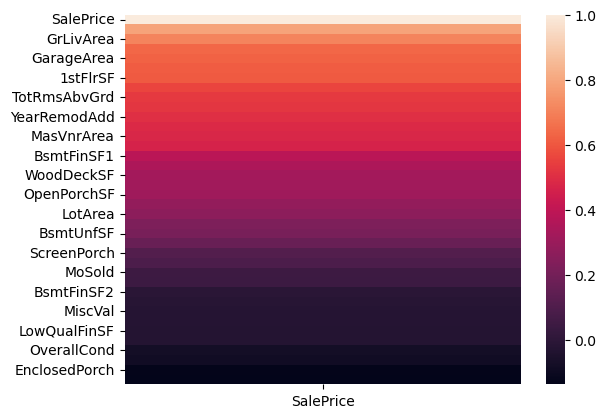

In [161]:
sns.heatmap(corr[["SalePrice"]].sort_values(by="SalePrice", ascending= False))

We have GrLivArea, GarageArea, 1stFlrSF with very strong corelation, so let's plot them against SalePrice 

<AxesSubplot:xlabel='GrLivArea', ylabel='SalePrice'>

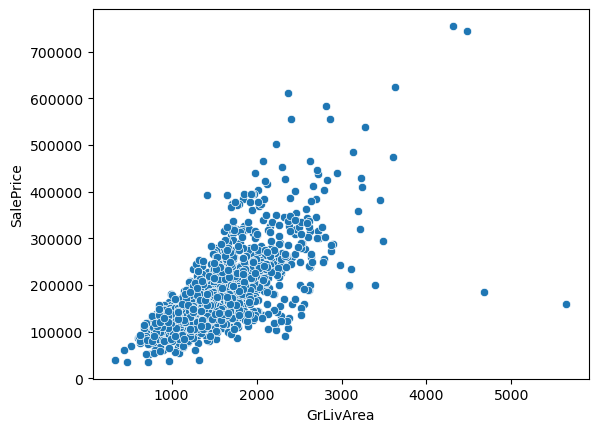

In [162]:
sns.scatterplot(x="GrLivArea", y = "SalePrice", data=df)

<AxesSubplot:xlabel='GarageArea', ylabel='SalePrice'>

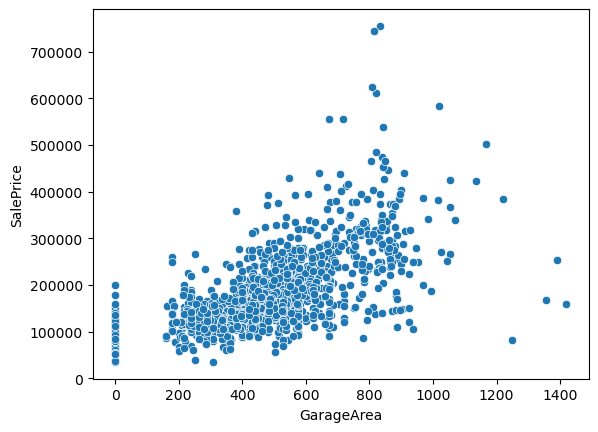

In [163]:
sns.scatterplot(x="GarageArea", y = "SalePrice", data=df)

<AxesSubplot:xlabel='1stFlrSF', ylabel='SalePrice'>

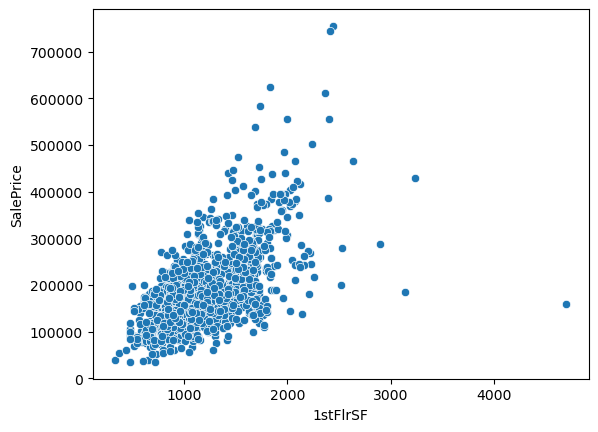

In [164]:
sns.scatterplot(x="1stFlrSF", y = "SalePrice", data=df)

It seems like there is a linear relationship in all plots

<AxesSubplot:xlabel='OverallQual', ylabel='SalePrice'>

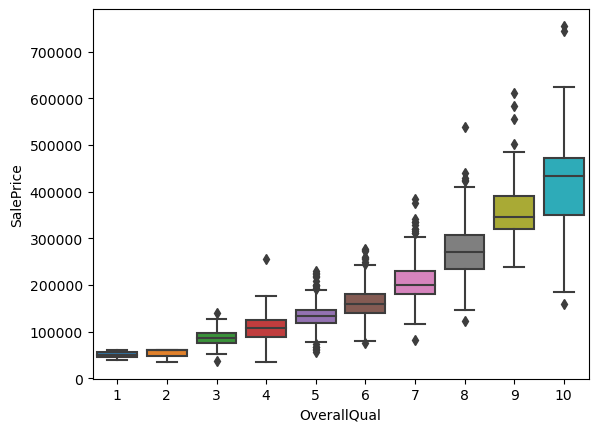

In [165]:
sns.boxplot(x = "OverallQual", y = "SalePrice", data = df)

We can see here in this boxplot with a random feature "OverallQuell" we have some outliers.
Also, it seems like the overallQual in proportional linear with SalePrice.

In [166]:
df.select_dtypes(include="object").head()


,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
1,RL,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
2,RL,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
3,RL,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,...,Detchd,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Abnorml
4,RL,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal


Let's choose SaleCondition

<AxesSubplot:xlabel='SaleCondition', ylabel='SalePrice'>

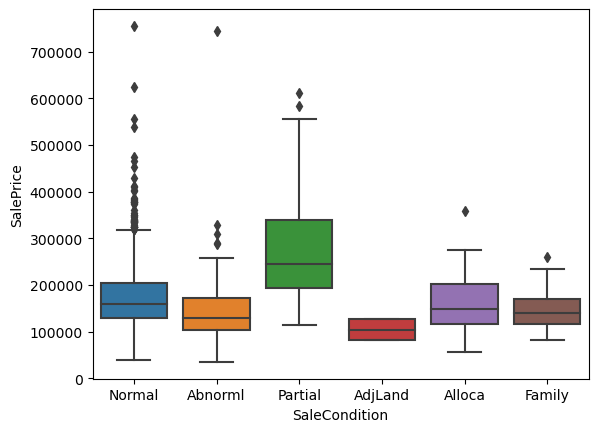

In [167]:
sns.boxplot(x = "SaleCondition", y = "SalePrice", data = df)

<p>We can notice that houses with partial sale condition tend to have higher sale prices than other sale conditions.</p> <p>Also, there are many outliers in the Normal category.</p>

Now let's use the Z-score and IQR methods to determine outliers.

In [168]:
from scipy.stats import zscore

z_scores = zscore(df["SalePrice"])
outliers = df["SalePrice"][abs(z_scores) > 3]
outliers

58      438780
178     501837
185     475000
349     437154
389     426000
440     555000
473     440000
496     430000
527     446261
591     451950
664     423000
691     755000
769     538000
798     485000
803     582933
898     611657
1046    556581
1142    424870
1169    625000
1182    745000
1243    465000
1373    466500
Name: SalePrice, dtype: int64

In [169]:
Q1 = df["SalePrice"].quantile(0.25)
Q3 = df["SalePrice"].quantile(0.75)

IQR = Q3 - Q1

outliers = df["SalePrice"][(df["SalePrice"] < (Q1 - IQR*1.5)) | (df["SalePrice"] > (Q3 + IQR*1.5))]
outliers

11      345000
53      385000
58      438780
112     383970
151     372402
         ...  
1268    381000
1353    410000
1373    466500
1388    377500
1437    394617
Name: SalePrice, Length: 61, dtype: int64

The results are different because two different methods are used.

Now let's clean our dataset starting with the outliers.

In [170]:
df.isnull().sum().sort_values().tail(15)

BsmtCond          37
BsmtFinType1      37
BsmtFinType2      38
BsmtExposure      38
GarageQual        81
GarageFinish      81
GarageYrBlt       81
GarageType        81
GarageCond        81
LotFrontage      259
FireplaceQu      690
Fence           1179
Alley           1369
MiscFeature     1406
PoolQC          1453
dtype: int64

Since we have 1460 records, let's drop last 

In [171]:
df = df.drop(columns = ["PoolQC","MiscFeature","Alley","Fence","FireplaceQu"])

Let's explore some other variables' values

In [172]:
display(df["LotFrontage"].unique())
display(df["GarageCond"].unique())

array([ 65.,  80.,  68.,  60.,  84.,  85.,  75.,  nan,  51.,  50.,  70.,
        91.,  72.,  66., 101.,  57.,  44., 110.,  98.,  47., 108., 112.,
        74., 115.,  61.,  48.,  33.,  52., 100.,  24.,  89.,  63.,  76.,
        81.,  95.,  69.,  21.,  32.,  78., 121., 122.,  40., 105.,  73.,
        77.,  64.,  94.,  34.,  90.,  55.,  88.,  82.,  71., 120., 107.,
        92., 134.,  62.,  86., 141.,  97.,  54.,  41.,  79., 174.,  99.,
        67.,  83.,  43., 103.,  93.,  30., 129., 140.,  35.,  37., 118.,
        87., 116., 150., 111.,  49.,  96.,  59.,  36.,  56., 102.,  58.,
        38., 109., 130.,  53., 137.,  45., 106., 104.,  42.,  39., 144.,
       114., 128., 149., 313., 168., 182., 138., 160., 152., 124., 153.,
        46.])

array(['TA', 'Fa', nan, 'Gd', 'Po', 'Ex'], dtype=object)

In [173]:
nulls = df.isnull().sum()
have_null = nulls.sort_values()[nulls > 0]

columns = have_null.index

int_columns = [col for col in columns if df[col].dtype != np.object_]

str_columns = [col for col in columns if df[col].dtype == np.object_]
display(int_columns)
display(str_columns)

['MasVnrArea', 'GarageYrBlt', 'LotFrontage']

['Electrical',
 'MasVnrType',
 'BsmtQual',
 'BsmtCond',
 'BsmtFinType1',
 'BsmtFinType2',
 'BsmtExposure',
 'GarageQual',
 'GarageCond',
 'GarageType',
 'GarageFinish']

In [174]:
#Fill numeric columns with the median and categorical columns with mode
df[int_columns] = df[int_columns].fillna(df[int_columns].median())
df[str_columns] = df[str_columns].fillna(df[str_columns].mode().iloc[0])

df.isna().sum().sort_values()

Id              0
Functional      0
TotRmsAbvGrd    0
KitchenQual     0
KitchenAbvGr    0
               ..
Exterior1st     0
RoofMatl        0
RoofStyle       0
ExterCond       0
SalePrice       0
Length: 76, dtype: int64

After we cleaned nan values, now let's drop an uneccessary column (Id).

In [175]:
df.drop(columns = "Id",inplace=True)

Encoding categorical variables

In [176]:
categorical_columns = df.select_dtypes(include="object").columns
df = pd.get_dummies(df, columns=categorical_columns, drop_first=True)
df

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,60,65.0,8450,7,5,2003,2003,196.0,706,0,...,0,0,0,0,1,0,0,0,1,0
1,20,80.0,9600,6,8,1976,1976,0.0,978,0,...,0,0,0,0,1,0,0,0,1,0
2,60,68.0,11250,7,5,2001,2002,162.0,486,0,...,0,0,0,0,1,0,0,0,1,0
3,70,60.0,9550,7,5,1915,1970,0.0,216,0,...,0,0,0,0,1,0,0,0,0,0
4,60,84.0,14260,8,5,2000,2000,350.0,655,0,...,0,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,62.0,7917,6,5,1999,2000,0.0,0,0,...,0,0,0,0,1,0,0,0,1,0
1456,20,85.0,13175,6,6,1978,1988,119.0,790,163,...,0,0,0,0,1,0,0,0,1,0
1457,70,66.0,9042,7,9,1941,2006,0.0,275,0,...,0,0,0,0,1,0,0,0,1,0
1458,20,68.0,9717,5,6,1950,1996,0.0,49,1029,...,0,0,0,0,1,0,0,0,1,0


<h4>Scaling<h4>

In [177]:
from sklearn.preprocessing import StandardScaler

scalar = StandardScaler()

scalar.fit(df[int_columns]) # store the mean and the std
df[int_columns] = scalar.transform(df[int_columns]) # scale each record



<h3>Log-transform SalePrice</h3>
<p>Since our SalePrice is right skewed, we need to make it with zero skewness.</p>

<AxesSubplot:xlabel='SalePrice', ylabel='Count'>

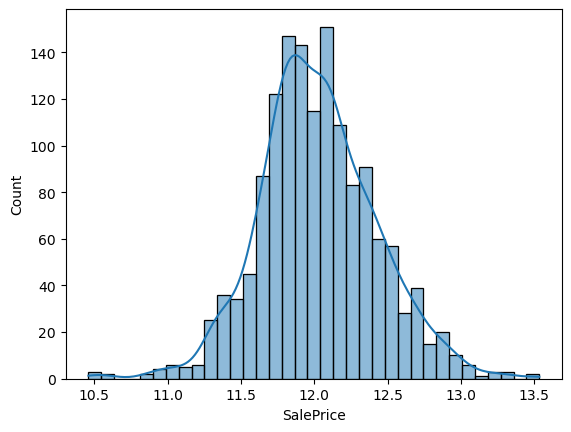

In [178]:
df["SalePrice"] = np.log(df["SalePrice"])
sns.histplot(data = df, x = "SalePrice", kde = True)

<h3>Models<h3>

In [179]:
x = df.drop(columns="SalePrice")
y = df["SalePrice"]

In [180]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

x_train, x_test, y_train, y_test = train_test_split(x,y, train_size=0.8, random_state=42)

linear_model = LinearRegression()
linear_model.fit(x_train,y_train)


LinearRegression()

<h3>Model Evaluation</h3>

In [181]:
y_pred = linear_model.predict(x_test)

In [182]:
from sklearn.metrics import r2_score, mean_squared_error

r2 = r2_score(y_test,y_pred)
rmse = mean_squared_error(y_test,y_pred)

print(f"R square score is: {r2:.5f}") # Variance of SalePrice
print(f"Root mean squared error is: {rmse:.5f}") 

R square score is: 0.76767
Root mean squared error is: 0.04336


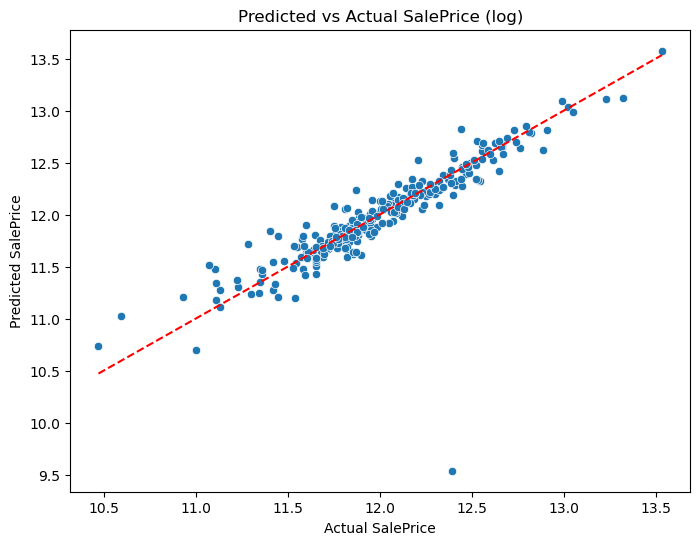

In [183]:
#Not by me
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel("Actual SalePrice")
plt.ylabel("Predicted SalePrice")
plt.title("Predicted vs Actual SalePrice (log)")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.show()